In [3]:
#breast ultrasound image mask bounding box using true mask

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#scikit-image

c:\Users\vivek\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
#use cv2 to read image
#use skimage to read mask

mask=cv2.imread(r'benign\benign (1)_mask.png')

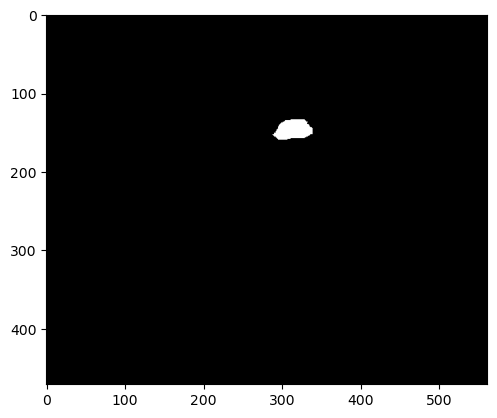

In [5]:
#show mask
plt.imshow(mask)

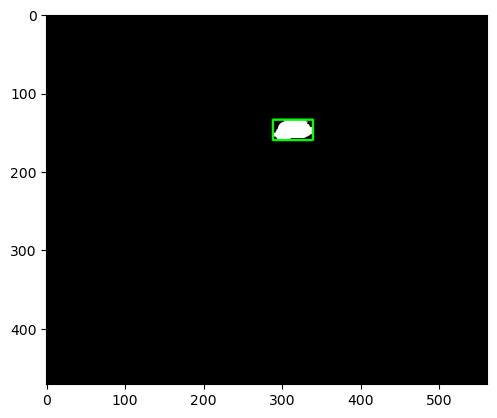

In [6]:
#generate mask bounding box around the mask
def mask_bounding_box(mask):
    #convert mask to gray scale
    gray=cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
    #find contours
    contours,_=cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    #get bounding box
    x,y,w,h=cv2.boundingRect(contours[0])
    return x,y,w,h

#call function
x,y,w,h=mask_bounding_box(mask)
#x,y,w,h are the coordinates of the bounding box
#x,y are the top left corner of the bounding box
#w is the width of the bounding box
#h is the height of the bounding box
x_min=x
y_min=y
x_max=x+w
y_max=y+h

#draw bounding box
cv2.rectangle(mask,(x_min,y_min),(x_max,y_max),(0,255,0),2)


#show mask with bounding box
plt.imshow(mask)

### Generating bounding box and center point using true masks

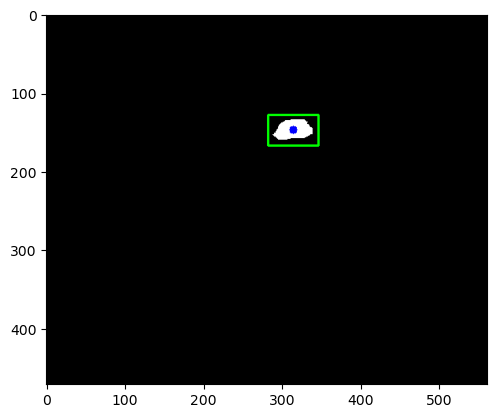

In [7]:
#generate mask bounding box around the mask leave some margin
#also generate center point of the mask

def mask_bounding_box(mask,margin=5):
    #convert mask to gray scale
    gray=cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
    #find contours
    contours,_=cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    #get bounding box
    largest_contour=max(contours,key=cv2.contourArea)

    x,y,w,h=cv2.boundingRect(largest_contour)
    #where x,y are the top left corner of the bounding box

    #add margin to the bounding box
    x_min=x-margin
    y_min=y-margin
    x_max=x+w+margin
    y_max=y+h+margin
    #get center point
    center_x=x+w//2
    center_y=y+h//2
    return x_min,y_min,x_max,y_max,center_x,center_y

#call function
x_min,y_min,x_max,y_max,center_x,center_y=mask_bounding_box(mask)

#draw bounding box
mask=cv2.imread(r'benign\benign (1)_mask.png')
cv2.rectangle(mask,(x_min,y_min),(x_max,y_max),(0,255,0),2)
#draw center point
cv2.circle(mask,(center_x,center_y),5,(0,0,255),-1)

#show mask with bounding box and center point
plt.imshow(mask)

In [9]:
#now access all the mask images in the folder and generate bounding box and center point for each mask image
#save values in a csv file

def generate_bounding_box_csv(mask_folder, csv_output_path):
    # list all mask images
    mask_images = os.listdir(mask_folder)

    #only use mask images

    mask_images=[mask_image for mask_image in mask_images if mask_image.endswith('_mask.png')]
    
    # initialize dataframe
    df = pd.DataFrame(columns=['image','x_min','y_min','x_max','y_max','center_x','center_y'])
    # iterate through all mask images
    for mask_image in mask_images:
        # read mask image
        mask = cv2.imread(os.path.join(mask_folder, mask_image))
        # get bounding box and center point
        x_min, y_min, x_max, y_max, center_x, center_y = mask_bounding_box(mask)
        # append to dataframe
        new_row = pd.DataFrame({'image':[mask_image],'x_min':[x_min],'y_min':[y_min],'x_max':[x_max],'y_max':[y_max],'center_x':[center_x],'center_y':[center_y]})
        df = pd.concat([df, new_row], ignore_index=True)
    # save dataframe to csv
    df.to_csv(csv_output_path, index=False)



In [10]:
#call function
generate_bounding_box_csv(r'benign', 'benign_bounding_box.csv')


In [11]:
generate_bounding_box_csv(r'malignant', 'malignant_bounding_box.csv')

In [12]:
#show bounding box csv
df_benign=pd.read_csv('benign_bounding_box.csv')
df_benign.head()

,image,x_min,y_min,x_max,y_max,center_x,center_y
0,benign (1)_mask.png,283,129,344,165,313,147
1,benign (10)_mask.png,19,62,238,269,128,165
2,benign (100)_mask.png,193,121,304,227,248,174
3,benign (101)_mask.png,433,167,542,228,487,197
4,benign (102)_mask.png,259,48,455,183,357,115


In [13]:
df_malignant=pd.read_csv('malignant_bounding_box.csv')
df_malignant.head()

,image,x_min,y_min,x_max,y_max,center_x,center_y
0,malignant (1)_mask.png,3,128,445,409,224,268
1,malignant (10)_mask.png,201,31,311,119,256,75
2,malignant (100)_mask.png,154,65,400,195,277,130
3,malignant (101)_mask.png,232,90,646,379,439,234
4,malignant (102)_mask.png,181,123,587,418,384,270


### Showing some examples of bounding boxes and center points

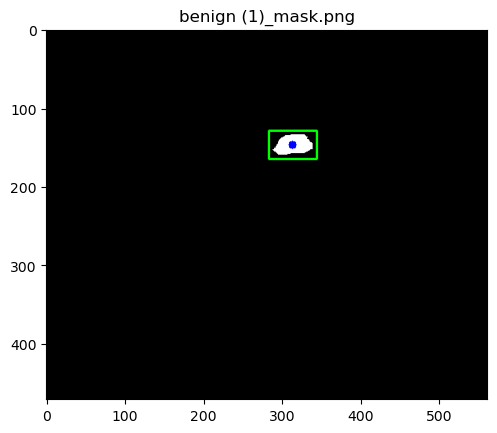

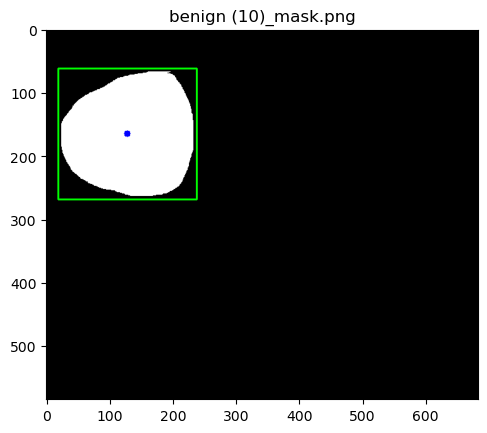

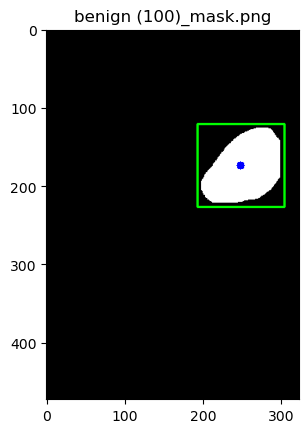

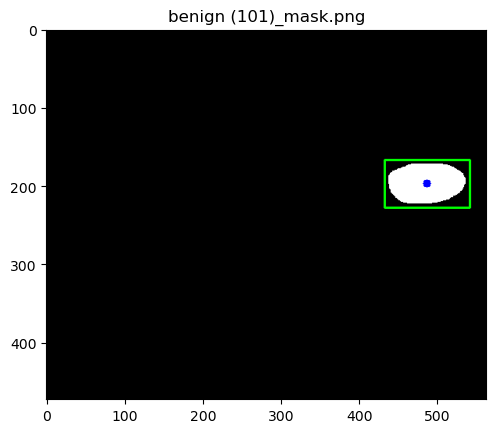

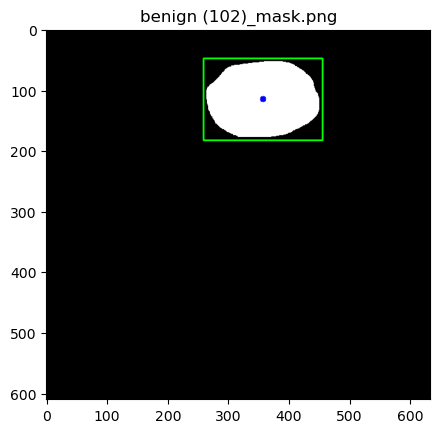

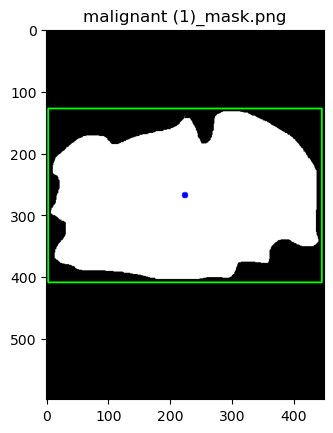

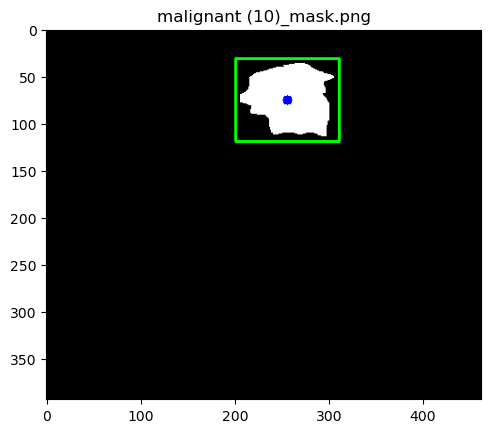

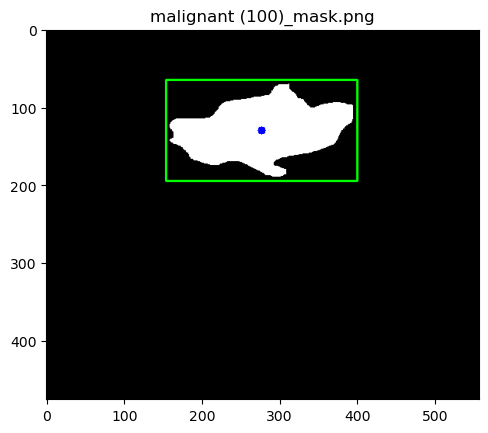

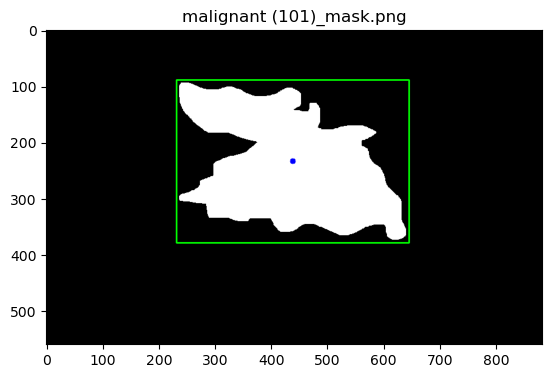

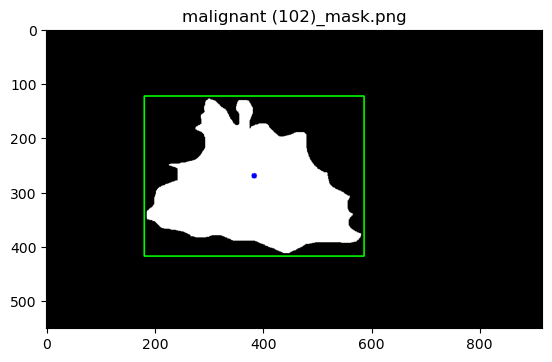

In [14]:
#show bounding box on image

def show_bounding_box(mask_folder, csv_file,examples):

    #show bounding box on example number of images
    df=pd.read_csv(csv_file)
    #get example images
    example_images=os.listdir(mask_folder)
    example_images=[example_image for example_image in example_images if example_image.endswith('_mask.png')][:examples]
    #iterate through example images
    for example_image in example_images:
        #read image
        image=cv2.imread(os.path.join(mask_folder,example_image))
        #get bounding box and center point
        x_min,y_min,x_max,y_max,center_x,center_y=df[df['image']==example_image].values[0][1:]
        #draw bounding box
        cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,255,0),2)
        #draw center point
        cv2.circle(image,(center_x,center_y),5,(0,0,255),-1)
        #show image
        plt.imshow(image)
        plt.title(example_image)
        plt.show()

#show bounding box on example number of images
show_bounding_box(r'benign','benign_bounding_box.csv',  5)

show_bounding_box(r'malignant','malignant_bounding_box.csv',5)



### Adding img paths to csv


In [19]:
df_benign=pd.read_csv('benign_bounding_box.csv')

In [20]:
df_benign.head()

,image,x_min,y_min,x_max,y_max,center_x,center_y
0,benign (1)_mask.png,283,129,344,165,313,147
1,benign (10)_mask.png,19,62,238,269,128,165
2,benign (100)_mask.png,193,121,304,227,248,174
3,benign (101)_mask.png,433,167,542,228,487,197
4,benign (102)_mask.png,259,48,455,183,357,115


In [21]:
# in image benign (1)_mask.png, actaul mask is benign (1)_mask.png
#path= Dataset_BUSI_with_GT\benign\benign (1).png

#add path column to the dataframe
df_benign['path']=['Dataset_BUSI_with_GT\\benign\\'+image.replace('_mask.png','.png') for image in df_benign['image']]
df_benign.head()

,image,x_min,y_min,x_max,y_max,center_x,center_y,path
0,benign (1)_mask.png,283,129,344,165,313,147,Dataset_BUSI_with_GT\benign\benign (1).png
1,benign (10)_mask.png,19,62,238,269,128,165,Dataset_BUSI_with_GT\benign\benign (10).png
2,benign (100)_mask.png,193,121,304,227,248,174,Dataset_BUSI_with_GT\benign\benign (100).png
3,benign (101)_mask.png,433,167,542,228,487,197,Dataset_BUSI_with_GT\benign\benign (101).png
4,benign (102)_mask.png,259,48,455,183,357,115,Dataset_BUSI_with_GT\benign\benign (102).png


In [22]:
#save the updated dataframe
df_benign.to_csv('benign_bounding_box.csv',index=False)

In [23]:
df_malignant=pd.read_csv('malignant_bounding_box.csv')
df_malignant.head()

# in image malignant (1)_mask.png, actaul mask is malignant (1)_mask.png
#path= Dataset_BUSI_with_GT\malignant\malignant (1).png

#add path column to the dataframe
df_malignant['path']=['Dataset_BUSI_with_GT\\malignant\\'+image.replace('_mask.png','.png') for image in df_malignant['image']]


#save the updated dataframe
df_malignant.to_csv('malignant_bounding_box.csv',index=False)

In [24]:
df_malignant.head()

,image,x_min,y_min,x_max,y_max,center_x,center_y,path
0,malignant (1)_mask.png,3,128,445,409,224,268,Dataset_BUSI_with_GT\malignant\malignant (1).png
1,malignant (10)_mask.png,201,31,311,119,256,75,Dataset_BUSI_with_GT\malignant\malignant (10).png
2,malignant (100)_mask.png,154,65,400,195,277,130,Dataset_BUSI_with_GT\malignant\malignant (100)...
3,malignant (101)_mask.png,232,90,646,379,439,234,Dataset_BUSI_with_GT\malignant\malignant (101)...
4,malignant (102)_mask.png,181,123,587,418,384,270,Dataset_BUSI_with_GT\malignant\malignant (102)...
